In [1]:
import sys
import skvideo.io
import skvideo.datasets

/home/misha/tensorflow/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D, Convolution2D, MaxPooling2D

Using TensorFlow backend.


In [3]:
from keras.optimizers import SGD, RMSprop, Nadam
from keras.utils import np_utils, generic_utils

In [4]:
import tensorflow as tf
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn import preprocessing

/home/misha/tensorflow/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


### Image specification

In [6]:
img_rows,img_cols,img_depth=40,40,15
r_state = 42
np.random.seed(r_state)
tf.set_random_seed(r_state)

### Training data

In [7]:
x_train = [] # variable to store entire dataset
x_test = []
y_train = []
y_test = []

### Open files

In [8]:
# load class 0
filename = '/home/misha/Documents/Thesis/Dataset/BNG_white_1'
videodata = skvideo.io.vreader(filename + '.mov')
frames = open(filename + '.csv', 'r')

my_frame = 0
frame_number = 0

for frame in videodata:
    if (frame_number >= 130 and frame_number < 1630): # 1500 frames
        
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        res_img = cv2.resize(frame, (img_cols, img_rows), interpolation=cv2.INTER_AREA)
        x_train.append(res_img)
#         print(frame_number)

    if (frame_number >= 3900 and frame_number < 4300):   # 400 frames
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        res_img = cv2.resize(frame, (img_cols, img_rows), interpolation=cv2.INTER_AREA)
        x_test.append(res_img)
    frame_number += 1
print('Class 0:', len(x_train))



# load class 1
filename = '/home/misha/Documents/Thesis/Dataset/race_night'
videodata = skvideo.io.vreader(filename + '.mov')
frames = open(filename + '.csv', 'r')

my_frame = 0
frame_number = 0

for frame in videodata:
    if (frame_number >= 900 and frame_number < 2400): # 1500 frames
        
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        res_img = cv2.resize(frame, (img_cols, img_rows), interpolation=cv2.INTER_AREA)
        x_train.append(res_img)
#         print(frame_number)

    if (frame_number >= 4550 and frame_number < 4950):   # 400 frames
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        res_img = cv2.resize(frame, (img_cols, img_rows), interpolation=cv2.INTER_AREA)
        x_test.append(res_img)

    frame_number += 1
print('Class 1:', len(x_train))

Class 0: 1500
Class 1: 3000


In [9]:
print(len(x_train))

3000


In [10]:
y_train = np.ones((len(x_train),),dtype = int)
y_train[0:1500] = 0
y_train[1500:] = 1
                  
y_test = np.ones((len(x_test),),dtype = int)
y_test[0:400] = 0
y_test[400:] = 1

### CNN Training parameters

In [11]:
# print(y_test)

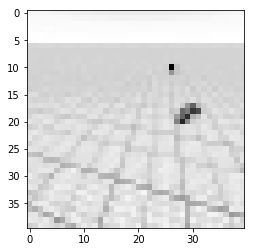

In [12]:
plt.imshow(x_test[101], cmap='gray')
plt.show()

In [13]:
# print(np.unique(X_test))

##### Assign label to each class

In [14]:
X_train = np.zeros((len(x_train), img_rows,img_cols))
X_test = np.zeros((len(x_test), img_rows,img_cols))

for h in range(len(x_train)):
    X_train[h][:][:] = x_train[h][:][:]

for h in range(len(x_test)):
    X_test[h][:][:] = x_test[h][:][:]


# patch_size = 15

In [15]:
print(X_train.shape, 'train samples')

(3000, 40, 40) train samples


##### CNN training parameters

In [16]:
batch_size = 20
nb_classes = 2
nb_epoch = 10

##### convert class vectors to binary class matrices

In [17]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

##### number of convolutional filters to use at each layer

In [18]:
nb_filters = [32, 32]

##### level of pooling to perform at each layer (POOL x POOL)

In [19]:
nb_pool = [2, 2]

##### Level of convolution to perform at each layer (CONV x CONV)

In [20]:
nb_conv = [3,3]

### Pre-processing

In [21]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# X_train -= np.mean(train_set)

X_train /=np.max(X_train)
X_test /=np.max(X_test)

### Define model

In [22]:
model = Sequential()
model.add(Convolution2D(6, 2, 2,input_shape=(40,40,1,)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(16, 3, 3))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Convolution2D(32, 2, 2))
# model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

# add flattening

model.compile(loss='categorical_crossentropy',
              optimizer=Nadam(lr=0.002),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 39, 39, 6)         30        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 16)        880       
_________________________________________________________________
flatten_1 (Flatten)          (None, 4624)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1184000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
__________

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (2, 2), input_shape=(40, 40, 1...)`
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  after removing the cwd from sys.path.


#### Split the data

In [23]:
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)
print(np.unique(y_train), y_train[7])

[ 0.  1.] [ 1.  0.]


In [24]:
print(X_train[100])

[[ 0.96047431  0.95652175  0.95652175 ...,  0.94861662  0.95256919
   0.95652175]
 [ 0.98023713  0.97628456  0.972332   ...,  0.96837944  0.972332    0.972332  ]
 [ 0.98418975  0.98418975  0.98418975 ...,  0.98418975  0.98418975
   0.98418975]
 ..., 
 [ 0.91699606  0.90513831  0.90513831 ...,  0.92490119  0.90513831
   0.92490119]
 [ 0.94071144  0.95256919  0.92490119 ...,  0.92094862  0.92094862
   0.9130435 ]
 [ 0.88142294  0.87747037  0.91699606 ...,  0.94861662  0.95256919
   0.92885375]]


In [25]:
# X_train_new, X_val_new, y_train_new,y_val_new =  train_test_split(train_set, Y_train, test_size=0.2, random_state=4)

In [26]:
X_train = np.expand_dims(X_train, axis=3)
print(X_train.shape)

X_test = np.expand_dims(X_test, axis=3)
print(X_test.shape)

(3000, 40, 40, 1)
(800, 40, 40, 1)


#### Training

In [27]:
# print(model.lr.get_value())
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train,y_train, random_state = r_state)

In [28]:
hist = model.fit(X_train, y_train, validation_data=(X_test,y_test),
          batch_size=batch_size, epochs=nb_epoch,shuffle=True)

Train on 3000 samples, validate on 800 samples
Epoch 1/10
3000/3000 [==============================] - 1s - loss: 0.0965 - acc: 0.9723 - val_loss: 1.1943e-07 - val_acc: 1.0000
Epoch 2/10
3000/3000 [==============================] - 0s - loss: 2.2370e-06 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/10
3000/3000 [==============================] - 0s - loss: 6.5174e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/10
3000/3000 [==============================] - 0s - loss: 7.8267e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/10
3000/3000 [==============================] - 0s - loss: 9.9398e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6/10
3000/3000 [==============================] - 0s - loss: 1.2454e-06 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/10
3000/3000 [==============================] - 0s - loss: 3.3504e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8/10
3000/3000 [====

### Evaluate the model

In [29]:
score = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score[0])
print('Test accuracy:', score[1]) 


 20/800 [..............................] - ETA: 0sTest score: 1.19209303762e-07
Test accuracy: 1.0


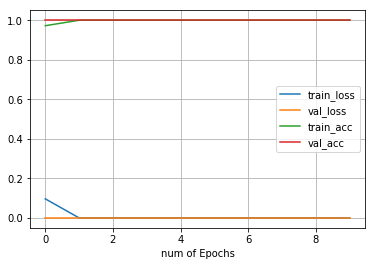

In [30]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']

plt.plot(train_loss)
plt.plot(val_loss)
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('num of Epochs')
plt.grid(True)
plt.legend(['train_loss','val_loss','train_acc', 'val_acc'])

plt.show()